In [68]:
import pandas as pd
import numpy as np
import time
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [69]:
# Read in probability data
prob_df = pd.read_csv('CRISPR_gene_dependency 3.06.36 PM.csv')
# Read in labels
label_df = pd.read_csv('sample_info.csv').reset_index()


# Select desired labels only
label_df = label_df[['DepMap_ID', 'lineage', 'sex']]

In [70]:
# Combine labels with probablities
combined_df = pd.merge(prob_df, label_df, left_on='DepMap_ID', right_on='DepMap_ID')

In [71]:
combined_df

,DepMap_ID,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009),lineage,sex
0,ACH-000001,0.094568,0.012519,0.027460,0.025962,0.073412,0.027340,0.020199,0.284733,0.022084,...,0.034309,0.007142,0.004241,0.082956,0.012000,0.003592,0.012679,0.324623,ovary,Female
1,ACH-000004,0.012676,0.049011,0.075933,0.033215,0.013176,0.097497,0.005015,0.153166,0.007358,...,0.007125,0.021209,0.011203,0.060266,0.128375,0.005911,0.004645,0.042530,blood,Male
2,ACH-000005,0.053957,0.027968,0.010139,0.005448,0.018599,0.081636,0.005457,0.159904,0.050884,...,0.054525,0.033396,0.033416,0.034712,0.092832,0.012482,0.020843,0.050412,blood,Male
3,ACH-000007,0.026704,0.083588,0.008853,0.011299,0.027288,0.028349,0.032573,0.166503,0.047045,...,0.011212,0.002200,0.005432,0.035241,0.138445,0.103161,0.146222,0.274833,colorectal,Male
4,ACH-000009,0.059383,0.051826,0.015370,0.011721,0.030062,0.078373,0.042128,0.184783,0.032335,...,0.029011,0.002816,0.056461,0.189550,0.328064,0.035161,0.058402,0.269194,colorectal,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,ACH-002834,0.012720,0.083840,0.013308,0.013315,0.107286,0.079063,0.013340,0.717478,0.040061,...,0.022403,0.052849,0.029567,0.029711,0.024132,0.174946,0.091510,0.421153,bone,Female
1082,ACH-002847,0.058547,0.079576,0.036707,0.030234,0.069976,0.032828,0.012784,0.476383,0.096910,...,0.014249,0.018715,0.010776,0.072452,0.131375,0.115486,0.094022,0.438092,unknown,Female
1083,ACH-002874,0.169875,0.017430,0.017965,0.008615,0.117915,0.075693,0.087961,0.144152,0.140377,...,0.045149,0.044243,0.017923,0.077515,0.094231,0.166188,0.058117,0.302708,skin,Female
1084,ACH-002875,0.035519,0.099789,0.071748,0.048479,0.245413,0.154663,0.045155,0.324723,0.089083,...,0.055878,0.039710,0.017571,0.101216,0.087739,0.050947,0.182081,0.349872,skin,Male


In [87]:
combined_df['lineage'].value_counts()

lung                         130
central_nervous_system        76
upper_aerodigestive           67
skin                          64
blood                         58
ovary                         57
colorectal                    51
breast                        47
pancreas                      44
soft_tissue                   41
bone                          38
lymphocyte                    37
peripheral_nervous_system     35
uterus                        34
gastric                       32
esophagus                     31
urinary_tract                 29
kidney                        27
bile_duct                     26
liver                         22
plasma_cell                   19
cervix                        16
eye                           14
thyroid                       13
prostate                       9
unknown                        3
epidermoid_carcinoma           1
embryo                         1
Name: lineage, dtype: int64

In [72]:
combined_df.dropna(axis=0, inplace=True)

In [73]:
X = combined_df.drop(columns=['lineage', 'DepMap_ID'])
X = pd.get_dummies(X)

y = combined_df['lineage']

In [74]:
best = SelectKBest(chi2, k=50)
X_new = pd.DataFrame(best.fit_transform(X,y))
features = best.get_feature_names_out()
X_new.columns = best.get_feature_names_out()

In [75]:
X_new

,ARHGAP45 (23526),ARHGEF7 (8874),ATP1B3 (483),BCL2 (596),BRAF (673),CBFB (865),CCND3 (896),CD79A (973),CDS2 (8760),CTNNB1 (1499),...,RUNX1 (861),SH3GL1 (6455),SPDEF (25803),TCF3 (6929),TCF7L2 (6934),TFAP2A (7020),TP63 (8626),ZEB2 (9839),sex_Female,sex_Male
0,0.025600,0.078397,0.146874,0.019396,0.594982,0.448670,0.096666,0.011594,0.162053,0.124879,...,0.071672,0.140841,0.015733,0.060819,0.024147,0.007234,0.004809,0.315097,1.0,0.0
1,0.158915,0.062804,0.940979,0.021727,0.024038,0.951911,0.387236,0.027686,0.990375,0.254138,...,0.969345,0.305438,0.043413,0.042739,0.046585,0.013271,0.046606,0.947729,0.0,1.0
2,0.258702,0.122013,0.901042,0.054585,0.017091,0.883406,0.667502,0.005885,0.870314,0.095995,...,0.935865,0.143619,0.004673,0.209097,0.033178,0.003561,0.028692,0.836506,0.0,1.0
3,0.111334,0.152606,0.042058,0.024531,0.028146,0.001831,0.168773,0.007971,0.010300,0.691170,...,0.005627,0.312051,0.005339,0.003362,0.763015,0.025258,0.018996,0.245489,0.0,1.0
4,0.045415,0.904236,0.267964,0.011488,0.032702,0.069592,0.270825,0.017764,0.052669,0.876449,...,0.008104,0.067644,0.009105,0.006543,0.570067,0.005602,0.049250,0.238158,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,0.056973,0.647422,0.089253,0.028831,0.063938,0.048692,0.522054,0.004509,0.568743,0.031369,...,0.011800,0.089542,0.194514,0.073764,0.026310,0.039141,0.028660,0.131273,1.0,0.0
1018,0.014518,0.105165,0.158551,0.019720,0.068649,0.001208,0.070484,0.025353,0.615476,0.291531,...,0.009921,0.190883,0.018630,0.046895,0.056484,0.119009,0.038436,0.074982,1.0,0.0
1019,0.038366,0.052416,0.266882,0.092720,0.978890,0.003966,0.217028,0.020398,0.264199,0.125870,...,0.005058,0.206837,0.028871,0.054679,0.171966,0.016770,0.019122,0.170050,1.0,0.0
1020,0.039508,0.119137,0.943639,0.019736,0.978889,0.246148,0.824936,0.011771,0.854072,0.178757,...,0.015032,0.240494,0.044943,0.113832,0.176882,0.739329,0.029678,0.609835,0.0,1.0


In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)
logreg = LogisticRegression(multi_class='multinomial')
logreg.fit(X_train, y_train)

/Users/dpogrebitskiy/opt/anaconda3/envs/ds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [77]:
logreg.score(X_test,y_test)

0.58984375

In [85]:
np.unique(y_test)

array(['bile_duct', 'blood', 'bone', 'breast', 'central_nervous_system',
       'cervix', 'colorectal', 'embryo', 'esophagus', 'eye', 'gastric',
       'kidney', 'liver', 'lung', 'lymphocyte', 'ovary', 'pancreas',
       'peripheral_nervous_system', 'plasma_cell', 'prostate', 'skin',
       'soft_tissue', 'thyroid', 'upper_aerodigestive', 'urinary_tract',
       'uterus'], dtype=object)

In [86]:
y_test.unique()

array(['upper_aerodigestive', 'blood', 'peripheral_nervous_system',
       'lymphocyte', 'prostate', 'soft_tissue', 'lung', 'skin',
       'central_nervous_system', 'bile_duct', 'pancreas', 'colorectal',
       'cervix', 'kidney', 'liver', 'gastric', 'urinary_tract', 'uterus',
       'esophagus', 'plasma_cell', 'eye', 'bone', 'ovary', 'breast',
       'embryo', 'thyroid'], dtype=object)

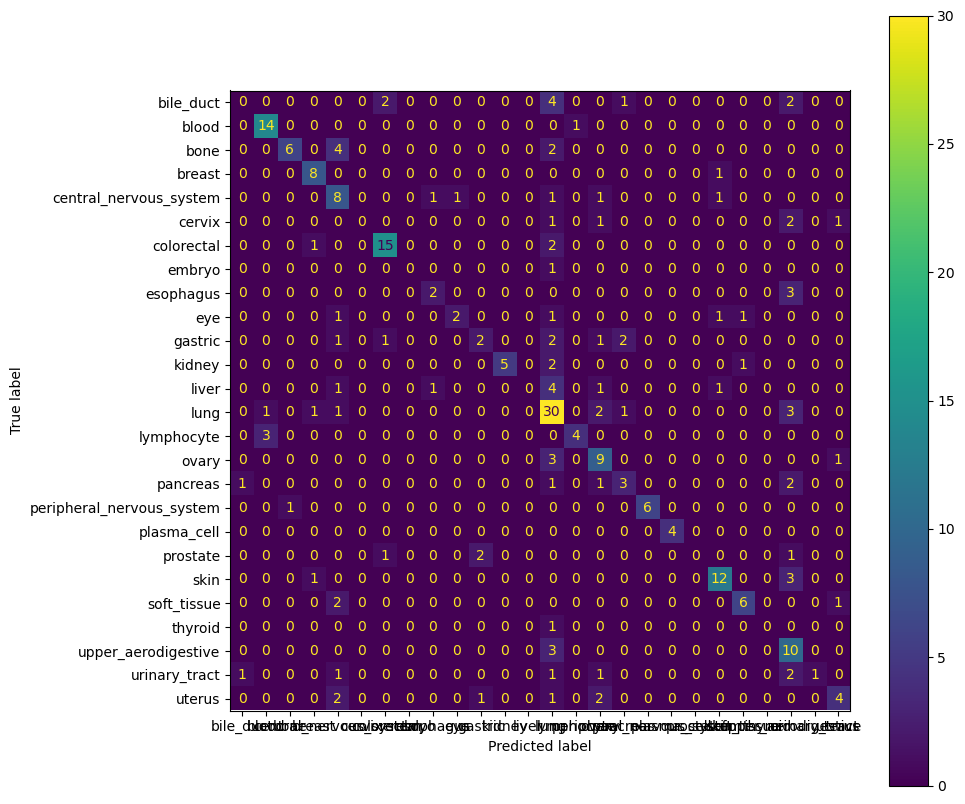

In [78]:
y_pred = logreg.predict(X_test)
conf = confusion_matrix(y_true=y_test, y_pred=y_pred)
ConfusionMatrixDisplay(conf, display_labels=np.unique(y_test)).plot()
plt.gcf().set_size_inches(10, 10)
plt.grid(False)

In [79]:
combined_df.columns = map(lambda x:x.split(' ')[0], combined_df.columns)

In [80]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [81]:
knn.score(X_test,y_test)

0.3046875

In [82]:
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [83]:
svm.score(X_test,y_test)

0.25390625

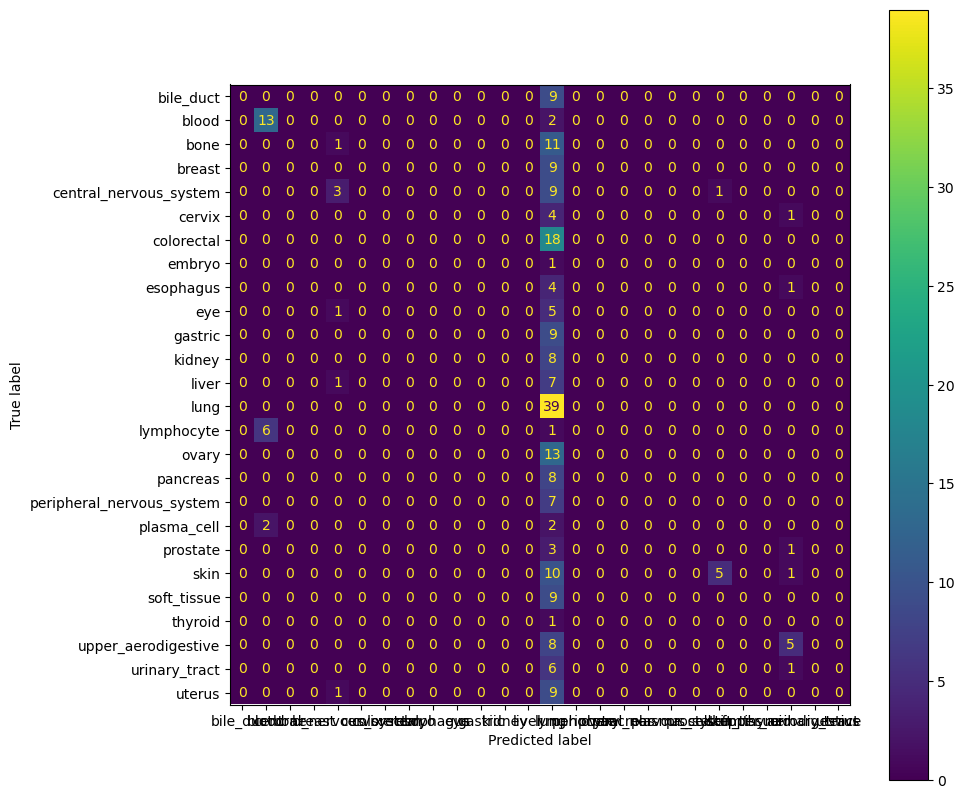

In [84]:
conf = confusion_matrix(y_true=y_test, y_pred = svm.predict(X_test))
ConfusionMatrixDisplay(conf, display_labels=np.unique(y_test)).plot()
plt.gcf().set_size_inches(10, 10)
plt.grid(False)